# Fly Cattt - Student Academic Performance

# Import tool for Machine Learning and Prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Business Understanding
### This student's academic performance data is collected using a leaner activity tracker tool. By monitoring learning progress and learner's actions like reading an articles or discussing related subject a lot, we can determine the critical factors that affect the performance of students and build an efficient classification model to predict the students academic performance. Our goal is to help student improve their grade in the middle of studying by changing some actions and by advising.

# Data Understanding
### This data set consists of 480 student records(305 males and 175 females) and 16 features. The possible values used to implement the DM algorithm and building classification model are shown in the table. Our target variable is students' mark level, which is classified into three numerical intervals: Low-Level, Middle-Level, High-Level.![image.png]()

# Data Preparation
## 1. Data Exploration
### 1.1. Descriptive Statistics
### 1.2. Missing Value Detecting and Problem Resolving if any
### 1.3. Outliers Detection
## 2. Data Preprocessing and Data Re-construction
### Data cleaning during preprocessing stage
### Based on One Hot Encoding, create dummy variables for categorical variables.
## 3. Data Visulization
### 3.1. Comparision Visulization
#### Does a feature have an outlier (using boxplot)?
### 3.2. Relationship Visulization
#### How the continuous variables changes in response to a change in another? How do two feactures interact with each other (using correlation heatmap)?

### Load data

In [2]:
student_data = pd.read_csv('Students Academic Performance Dataset.csv')

student_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### Check Missing Data

In [3]:
# to see whether we have missing data or not.
total = student_data.isnull().sum().sort_values(ascending = False)
percent = (student_data.isnull().sum()/ student_data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data
# there is no missing data in this dataset

,Total,Percent
gender,0,0.0
raisedhands,0,0.0
StudentAbsenceDays,0,0.0
ParentschoolSatisfaction,0,0.0
ParentAnsweringSurvey,0,0.0
Discussion,0,0.0
AnnouncementsView,0,0.0
VisITedResources,0,0.0
Relation,0,0.0
NationalITy,0,0.0


In [4]:
pd.melt(student_data,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView'])

,Class,variable,value
0,M,raisedhands,15
1,M,raisedhands,20
2,L,raisedhands,10
3,L,raisedhands,30
4,M,raisedhands,40
...,...,...,...
1435,L,AnnouncementsView,5
1436,M,AnnouncementsView,14
1437,M,AnnouncementsView,25
1438,L,AnnouncementsView,14


In [5]:
## student_data['count'] = 1

## pd.melt(student_data,id_vars='Class',value_vars=['gender', 'count'])

### Data Visulazation - Descriptive Statistics

C:\Users\carme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

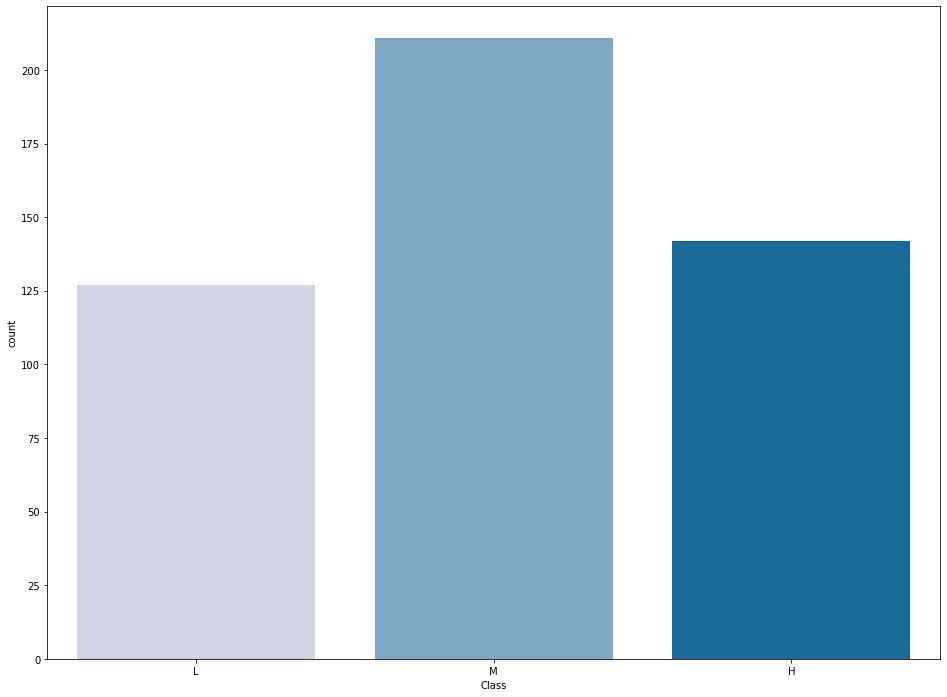

In [6]:
from pandas.api.types import CategoricalDtype
## explore data
plt.figure(figsize=(16,12))
ClassLabels = pd.Series(['L','M','H'])
student_data['Class'] = pd.Categorical(student_data['Class'], categories = ClassLabels , ordered = True)

sns.countplot(student_data['Class'].sort_values(), palette='PuBu')


### Detect Outliers

In [7]:
# Box Plot - Continuous Variables
## sns.boxplot(student_data['raisedhands'])
## sns.boxplot(student_data['VisITedResources'])
## sns.boxplot(student_data['AnnouncementsView'])
## sns.boxplot(student_data['Discussion'])

## create a def find outliers function

def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

outliers = find_outliers_IQR(student_data[['raisedhands','VisITedResources', 'AnnouncementsView','Discussion']])
outliers



,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
475,NaN,NaN,NaN,NaN
476,NaN,NaN,NaN,NaN
477,NaN,NaN,NaN,NaN
478,NaN,NaN,NaN,NaN


### Comparision Visulazation for outliers detection

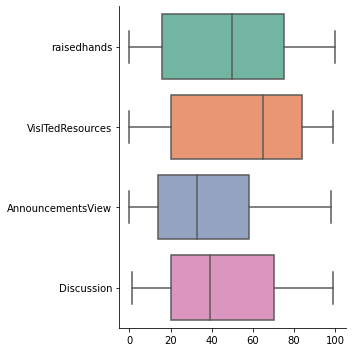

In [8]:
## plot to check the continuous variables outliers
sns.catplot(data=student_data, orient="h", kind="box", palette="Set2")


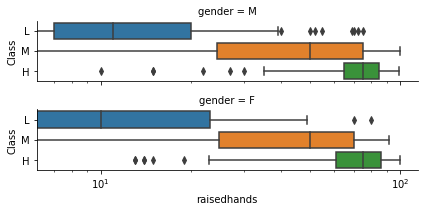

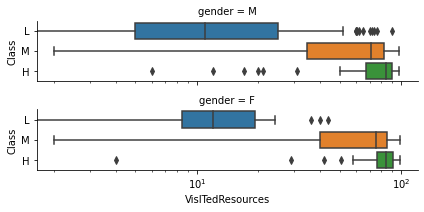

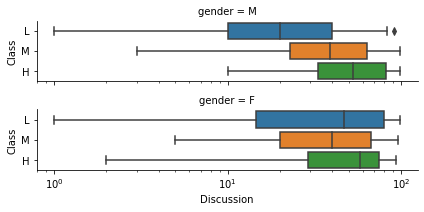

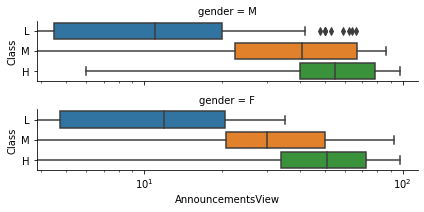

In [9]:
## Showing multiple relationships with facets
## add faceting variables to visualize higher-dimensional relationships
r = sns.catplot(x="raisedhands", y="Class", row="gender",
               kind="box", orient="h", height=1.5, aspect=4,
               data=student_data)
r.set(xscale="log")

v = sns.catplot(x="VisITedResources", y="Class", row="gender",
               kind="box", orient="h", height=1.5, aspect=4,
              data=student_data)
v.set(xscale="log")

d = sns.catplot(x="Discussion", y="Class", row="gender",
               kind="box", orient="h", height=1.5, aspect=4,
              data=student_data)
d.set(xscale="log")

a = sns.catplot(x="AnnouncementsView", y="Class", row="gender",
               kind="box", orient="h", height=1.5, aspect=4,
              data=student_data)
a.set(xscale="log")

### Construct Data
###### Attributes have to be in numeric form and be normalized to achieve best classification results.

In [10]:
## Convert categical data "Class" to numeric data
student_data['Class_numeric'] = student_data['Class'].map(dict(L=0,M=1,H=2))

student_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_numeric
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,1


#### One Hot Encoding

In [11]:
student_data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_numeric'],
      dtype='object')

In [12]:
## Building a better model, we have to change the categorical variables into dummy variables.
## To aviod multicollinearity, drop_first = True.
x = pd.get_dummies(student_data.drop(['ParentschoolSatisfaction', 'Class','Class_numeric'],axis=1),
                   columns=['gender', 'NationalITy', 'PlaceofBirth','StageID',
                            'GradeID','SectionID', 'Topic', 'Semester', 'Relation',
                            'ParentAnsweringSurvey','StudentAbsenceDays'],
                  drop_first = True)

y = student_data['Class_numeric']


## dframe = pd.DataFrame(x, y)

In [13]:
## check the feature names in "x" dataframe
x.columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'gender_M', 'NationalITy_Iran', 'NationalITy_Iraq',
       'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia',
       'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan',
       'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco',
       'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia',
       'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA',
       'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_MiddleSchool',
       'StageID_lowerlevel', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06',
       'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10',
       'GradeID_G-11', 'GradeID_G-12', 'SectionID_B', 'SectionID_C',
       'Topic_B

### Relationship Visulization - Continuous Variables Correlation Heatmap

In [14]:
student_data.info() ###View the number and type of variable lines

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    480 non-null    object  
 1   NationalITy               480 non-null    object  
 2   PlaceofBirth              480 non-null    object  
 3   StageID                   480 non-null    object  
 4   GradeID                   480 non-null    object  
 5   SectionID                 480 non-null    object  
 6   Topic                     480 non-null    object  
 7   Semester                  480 non-null    object  
 8   Relation                  480 non-null    object  
 9   raisedhands               480 non-null    int64   
 10  VisITedResources          480 non-null    int64   
 11  AnnouncementsView         480 non-null    int64   
 12  Discussion                480 non-null    int64   
 13  ParentAnsweringSurvey     480 non-null    object  

In [15]:
student_data.select_dtypes(include=["object"]).describe() ###Description of independent variables categorical variables

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
count,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7
freq,305,179,180,248,147,283,95,245,283,270,292,289


In [16]:
student_data.select_dtypes(include=["category"]).describe() ###Describe the dependent variable

,Class,Class_numeric
count,480,480
unique,3,3
top,M,1
freq,211,211


In [17]:
student_data.select_dtypes(include=["int"]).describe() ###Description of the independent variable continuous variable

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'raisedhands'),
  Text(0, 1.5, 'VisITedResources'),
  Text(0, 2.5, 'AnnouncementsView'),
  Text(0, 3.5, 'Discussion')])

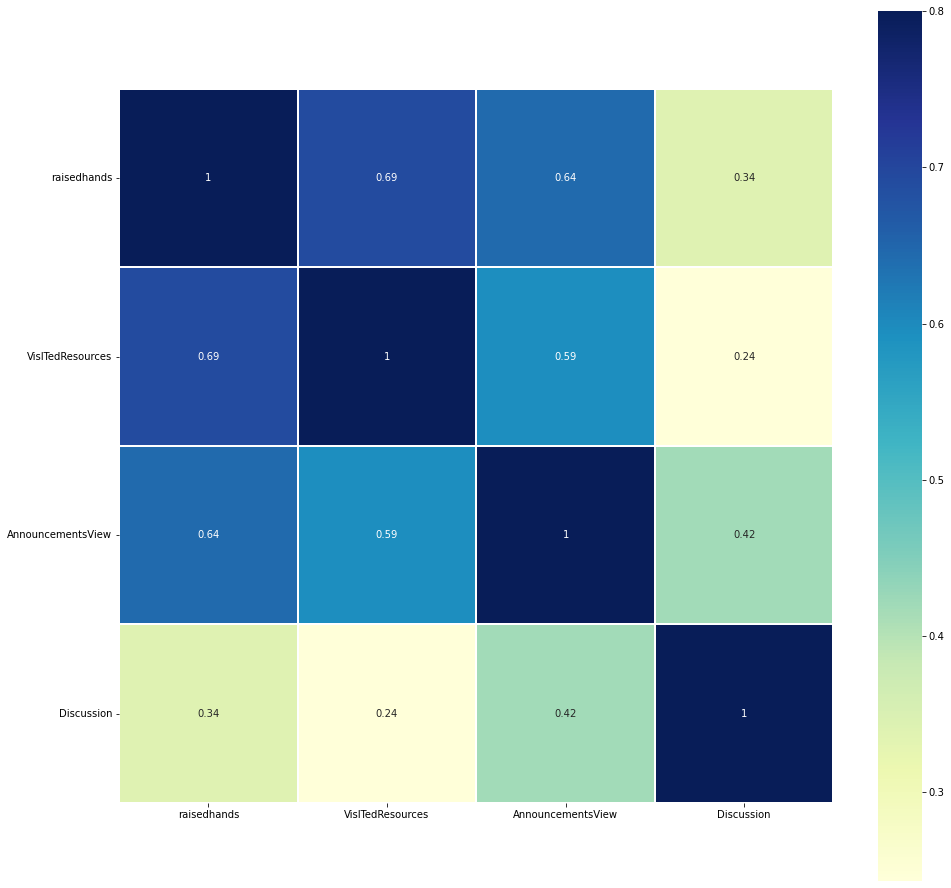

In [230]:
corrmat = student_data.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(corrmat, vmax = .8, 
            square = True, 
            linewidths=.1,
            cmap="YlGnBu", 
            annot=True)
plt.yticks(rotation = 0)

# Define Machine Learning Classification Algorithms and Train Model

### Models(Classifiers) -> Dataset Preprocessing (Feature Selection)
### Models(Classifiers) <- Dataset Preprocessing (Feature Selection)

##### Classification is one of the most important aspects of supervised learning. There are various classification algorithms like logistic regression, naive bayes, decision trees, random forests and many more.

##### Different model with different algorithms has some strengths and limitations, so the ultimate objective of ensemble methods is to complement the models, in order to achieve higher prediction accuracy. 

## 1. Train Model- Random Forest Classifier

##### Random forests is a supervised learning algorithm and an ensemble of decision tree algorithms. It is an extension of bootstrap aggregation (bagging) of decision trees and can be used for classification and regression problems. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In bagging, a number of decision trees are created where each tree is created from a different bootstrap sample of the training dataset. A bootstrap sample is referred to as sampling with replacement (small size of data set).

### Prepare data for training and testing

In [19]:
#### split data set into training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


### Rescale Features - Standardization (StandardScaler)
##### In this case, we need to ensure that values share a common property to reduce complexity and improve interpretability. Overall, our data doesn't has much outliers. Only if we add one dimension like Gender, which means that if we group the data by gender, there are some outliers. StandardScaler performs the task of Standardization. The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).

In [20]:
sc = StandardScaler()

sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

### Train the model and check accuracy

In [21]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=110, max_features=8, oob_score=True, random_state=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train_std,y_train)
y_pred=clf.predict(x_test_std)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


### Features Selection
##### a) Descriptive Statistics
##### b) Statistics Visualization

In [22]:
##### a) Descriptive Statistics
feature_imp = pd.Series(clf.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_imp

VisITedResources              0.177591
raisedhands                   0.141303
AnnouncementsView             0.112444
StudentAbsenceDays_Under-7    0.107817
Discussion                    0.087840
ParentAnsweringSurvey_Yes     0.039140
Relation_Mum                  0.039083
gender_M                      0.030704
SectionID_B                   0.014271
Semester_S                    0.013558
PlaceofBirth_Jordan           0.012806
PlaceofBirth_KuwaIT           0.011669
NationalITy_KW                0.011135
Topic_English                 0.010527
GradeID_G-04                  0.009880
Topic_IT                      0.009801
GradeID_G-08                  0.009776
Topic_French                  0.009638
StageID_lowerlevel            0.009602
SectionID_C                   0.009536
NationalITy_Jordan            0.009353
StageID_MiddleSchool          0.009349
Topic_Science                 0.008457
Topic_Chemistry               0.008044
GradeID_G-07                  0.007879
PlaceofBirth_SaudiArabia 

No handles with labels found to put in legend.


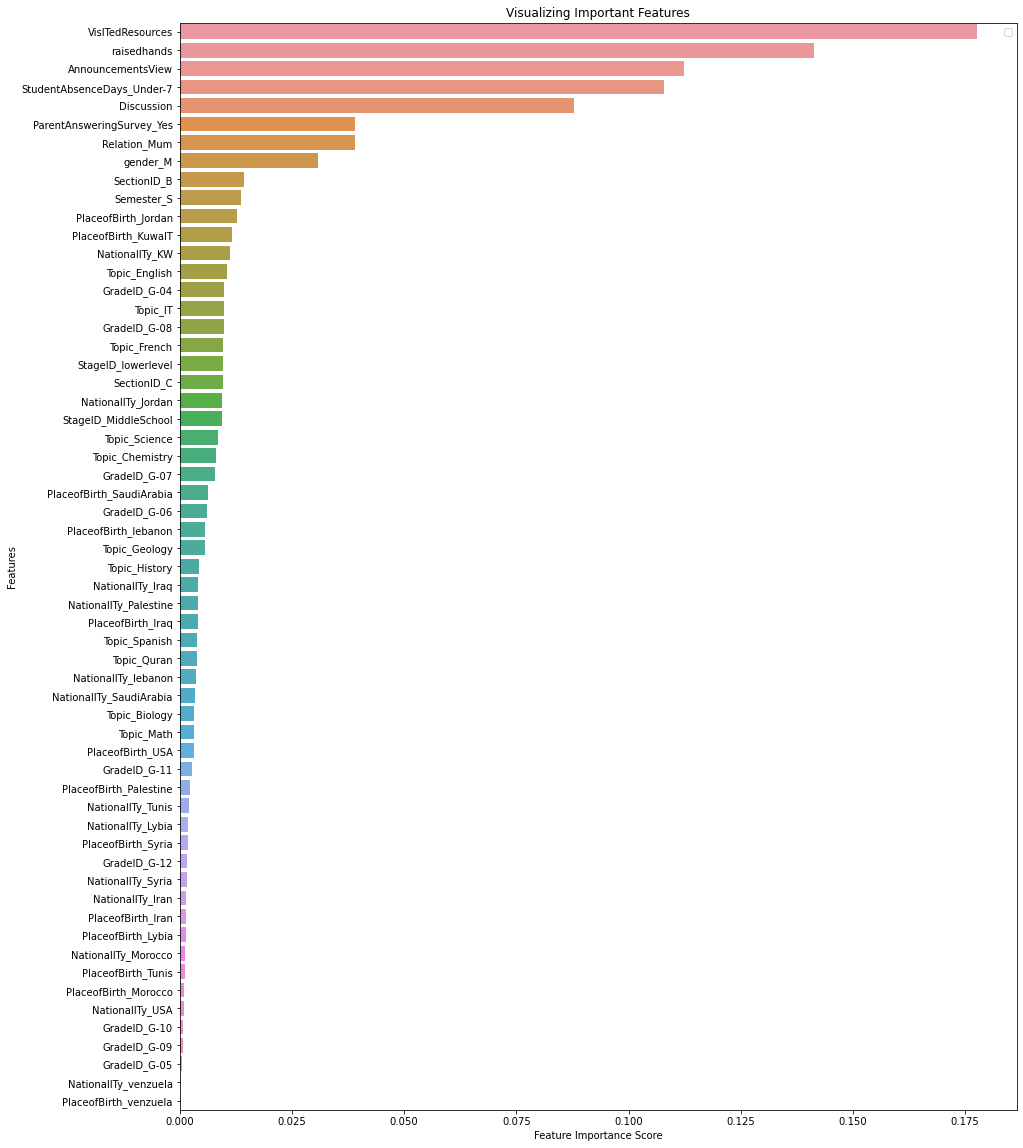

In [23]:
##### b) Statistics Visualization

%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,20))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Improve the model accuracy by features selection

In [24]:
x_new = pd.get_dummies(student_data.drop(['ParentschoolSatisfaction', 'NationalITy',
                                          'Semester', 'Class','PlaceofBirth',
                                          'Class_numeric'],axis=1),
                   columns=['gender', 'StageID','GradeID', 'SectionID',
                            'Topic', 'Relation','ParentAnsweringSurvey',
                            'StudentAbsenceDays'],
                  drop_first = True)

y = student_data['Class_numeric']

In [25]:
student_data.head() ###View current feature values

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_numeric
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,1


In [26]:
x_new.shape

(480, 32)

In [27]:
# Random Forest Classifier
##a = 0    
while (1):
    x_new_train, x_new_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3)
    sc = StandardScaler()
    sc.fit(x_new_train)
    x_new_train_std = sc.transform(x_new_train)
    x_test_std = sc.transform(x_new_test)
    #a =a + 1
    clf=RandomForestClassifier(n_estimators=144, max_features=7, oob_score=True, random_state=100)
    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(x_new_train_std,y_train)
    y_pred=clf.predict(x_test_std)
    output = metrics.accuracy_score(y_test, y_pred)          
    if output > 0.86:
        ##or a > 200: #80 #144 #76 #85    #195 #100 #196 #152 
        ##print(12+a)
        print("Accuracy:",output)
        break


Accuracy: 0.8611111111111112


In [28]:
# connect predictions with outputs
for i in range(10):
	print(x_new_train_std[i], y_pred[i])

[ 1.34956621  1.0803391   1.98035936  1.44954743  0.76479125  1.0059702
 -0.90344685 -0.32444284 -0.0949158  -0.28960485  2.12325145 -0.55901699
 -0.0949158  -0.05463584 -0.14586499 -0.14586499 -0.75504534 -0.2773501
  3.77792632 -0.20851441 -0.3300165  -0.44241331 -0.2236068  -0.20061824
 -0.48038446 -0.20061824 -0.20851441 -0.31311215 -0.2515773  -0.8712992
  0.87659629  0.82462113] 0
[ 0.79941476  0.59501254  1.08605578 -0.08530499  0.76479125  1.0059702
 -0.90344685 -0.32444284 -0.0949158  -0.28960485 -0.47097578  1.78885438
 -0.0949158  -0.05463584 -0.14586499 -0.14586499 -0.75504534 -0.2773501
 -0.26469547  4.79583152 -0.3300165  -0.44241331 -0.2236068  -0.20061824
 -0.48038446 -0.20061824 -0.20851441 -0.31311215 -0.2515773   1.14771137
  0.87659629 -1.21267813] 1
[-0.78631591  0.77701    -0.70255137 -0.44224741 -1.30754634 -0.99406523
  1.10687197 -0.32444284 -0.0949158  -0.28960485 -0.47097578 -0.55901699
 -0.0949158  -0.05463584 -0.14586499 -0.14586499  1.32442378 -0.2773501
 

## 2. Train Model - DecisionTreeClassifier

In [29]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=7, min_samples_split=4, min_samples_leaf=1, random_state=1)
dt.fit(x_new_train_std,y_train)
dtpred = dt.predict(x_test_std)
print("Accuracy:",metrics.accuracy_score(y_test, dtpred))    

Accuracy: 0.8055555555555556


## 3. Train Model - KNeighborsClassifier

In [303]:
# KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_new_train_std,y_train)
knnpred = knn.predict(x_test_std)

print("Accuracy:",metrics.accuracy_score(y_test, knnpred))    

Accuracy: 0.6319444444444444


## 4. Train Model - Logistic Regression

In [304]:
# Logistic Regression
Lr = LogisticRegression()
Lr.fit(x_new_train_std,y_train)
Lrpred = Lr.predict(x_test_std)
print("Accuracy:",metrics.accuracy_score(y_test, Lrpred))   

Accuracy: 0.8333333333333334


## 5. Train Model- XGBoost (eXtreme Gradient Boosting).
#### XGBoost is a popular supervised-learning algorithm used for regression and classification on large datasets. It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting.

### Load requried Libraries

In [256]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

SyntaxError: invalid syntax (Temp/ipykernel_6720/2810821042.py, line 1)

### Train the XGBoost model
### and
### Check the training accuracy with cross-validation and k-fold methods

In [ ]:
#### split data set into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#### standardization
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [ ]:


#### use the XGBoost Classifier
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.06,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=110, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
#### train the model
xgbc.fit(x_train_std, y_train)
y_pred=xgbc.predict(x_test_std)

#### check the training accuracy with cross-validation and k-fold methods.

scores = cross_val_score(xgbc, x_train_std, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, x_train_std, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Mean cross-validation score: 0.75
K-fold CV average score: 0.73
Accuracy: 0.8125


### XGBoost Model Improvement after Feature Re-selection

In [210]:
x_new = pd.get_dummies(student_data.drop(['ParentschoolSatisfaction', 'NationalITy',
                                          'Semester', 'Class','PlaceofBirth',
                                          'Class_numeric'],axis=1),
                   columns=['gender', 'StageID','GradeID', 'SectionID',
                            'Topic', 'Relation','ParentAnsweringSurvey',
                            'StudentAbsenceDays'],
                  drop_first = True)
y = student_data['Class_numeric']

x_new_train, x_new_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3)

sc = StandardScaler()
sc.fit(x_new_train)
x_new_train_std = sc.transform(x_new_train)
x_test_std = sc.transform(x_new_test)



In [211]:
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.06,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=110, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
#### train the model
xgbc.fit(x_new_train_std, y_train)
y_pred=xgbc.predict(x_test_std)

#### check the training accuracy with cross-validation and k-fold methods.

scores = cross_val_score(xgbc, x_new_train_std, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, x_new_train_std, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: name 'XGBClassifier' is not defined